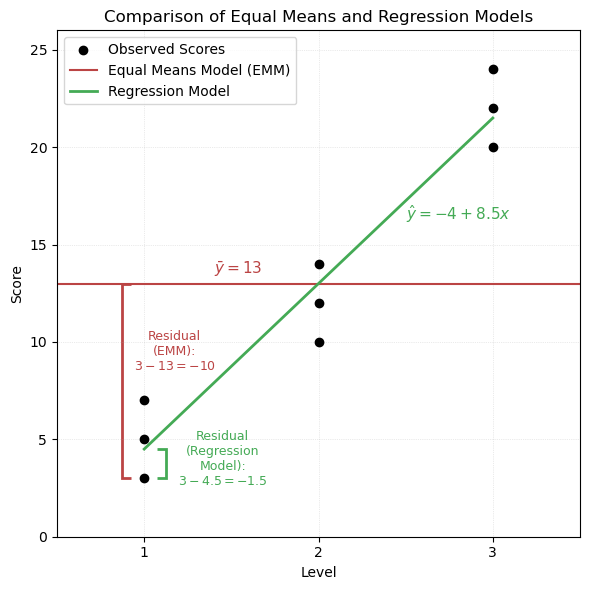

In [56]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import PathPatch
from matplotlib.path import Path

# Data
levels = np.repeat([1, 2, 3], 3)
scores = np.array([3, 5, 7, 10, 12, 14, 20, 22, 24])
x_vals = np.array([1, 2, 3])
grand_mean = np.mean(scores)

# Regression
slope = 8.5
intercept = -4
fitted_scores = intercept + slope * levels

# Highlighted residual (Level 1, Score = 3)
highlight_x = 1
highlight_y = 3
highlight_yhat = intercept + slope * highlight_x  # = 4.5

# Bracket shape settings
bracket_depth = 0.05

# Plot
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xticks(x_vals)
ax.set_xticklabels(['1', '2', '3'])
ax.set_xlabel("Level")
ax.set_ylabel("Score")
ax.set_title("Comparison of Equal Means and Regression Models")

# Observed points
ax.scatter(levels, scores, color='black', zorder=5, label='Observed Scores')

# Equal Means Model line
ax.axhline(grand_mean, color='#BB4444', linestyle='-', linewidth=1.5, label='Equal Means Model (EMM)')

# Regression Model line
reg_x = np.array([1, 3])
reg_y = intercept + slope * reg_x
ax.plot(reg_x, reg_y, color='#44AA55', linewidth=2, label='Regression Model')

# Residual bracket (Equal Means Model)
x_pos = highlight_x - 0.075
verts = [
    (x_pos, highlight_y),
    (x_pos - bracket_depth, highlight_y),
    (x_pos - bracket_depth, grand_mean),
    (x_pos, grand_mean)
]
codes = [Path.MOVETO, Path.LINETO, Path.LINETO, Path.LINETO]
path = Path(verts, codes)
patch = PathPatch(path, color='#BB4444', lw=2, fill=False)
ax.add_patch(patch)
# ax.text(x_pos + 0.25, (highlight_y + grand_mean)/2 + 1,
#         r"$3 - 13 = -10$", color='#BB4444', fontsize=10,
#         va='center', ha='center')
ax.text(
    x_pos + 0.25, (highlight_y + grand_mean)/2 + 1.5,
    "Residual\n(EMM):\n" + r"$3 - 13 = -10$",
    color='#BB4444', fontsize=9,
    va='center', ha='center'
)


# Residual bracket (Regression Model)
x_pos_r = highlight_x + 0.075
verts_r = [
    (x_pos_r, highlight_y),
    (x_pos_r + bracket_depth, highlight_y),
    (x_pos_r + bracket_depth, highlight_yhat),
    (x_pos_r, highlight_yhat)
]
codes_r = [Path.MOVETO, Path.LINETO, Path.LINETO, Path.LINETO]
path_r = Path(verts_r, codes_r)
patch_r = PathPatch(path_r, color='#44AA55', lw=2, fill=False)
ax.add_patch(patch_r)
# ax.text(x_pos_r + 0.375, (highlight_y + highlight_yhat)/2,
#         r"$3 - 4.5 = -1.5$", color='#44AA55', fontsize=10,
#         va='center', ha='center')
ax.text(x_pos_r + 0.375, (highlight_y + highlight_yhat)/2 + 0.25,
        "Residual\n(Regression\nModel):\n" + r"$3 - 4.5 = -1.5$", color='#44AA55', fontsize=9,
        va='center', ha='center')

# Mean and regression equation labels
ax.text(1.4, grand_mean + 0.5, r'$\bar{y} = 13$', color='#BB4444', fontsize=11)
ax.text(2.5, intercept + slope * 2.5 - 1, r'$\hat{y} = -4 + 8.5x$', color='#44AA55', fontsize=11, fontweight='bold')

# Grid and layout
ax.set_xlim(0.5, 3.5)
ax.set_ylim(0, 26)
ax.grid(True, which='both', linestyle=':', linewidth=0.5, alpha=0.5)
ax.legend()
plt.tight_layout()
plt.show()


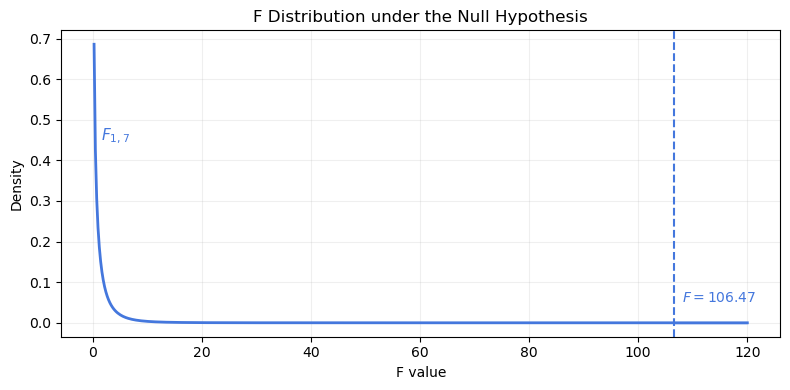

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f

# Parameters for the F-distribution
df_model = 1   # numerator df
df_error = 7   # denominator df
F_stat = 106.47

# Generate F-distribution values
x = np.linspace(0, 120, 500)
y = f.pdf(x, df_model, df_error)

# Plot the F-distribution curve
plt.figure(figsize=(8, 4))
plt.plot(x, y, color='#4477DD', lw=2)

# Shade the area beyond the F-statistic
x_shade = np.linspace(F_stat, 120, 200)
y_shade = f.pdf(x_shade, df_model, df_error)
plt.fill_between(x_shade, y_shade, color='#4477DD', alpha=0.4, label='p < 0.0001')

# Add vertical line at observed F-statistic
plt.axvline(F_stat, color='#4477DD', linestyle='--', lw=1.5)
plt.text(F_stat + 1.5, 0.05, r'$F = 106.47$', color='#4477DD', fontsize=10, fontweight='bold')

# Annotations
# plt.text(60, 0.02, 'Reject $H_0$: EMM', color='#BB4444', fontsize=12)
# plt.text(10, 0.02, 'Regression model', color='#44AA55', fontsize=12)
plt.text(1.5, 0.45, '$F_{1,7}$', color='#4477DD', fontsize=11, fontweight='bold')

# Axis and title
plt.xlabel('F value')
plt.ylabel('Density')
plt.title('F Distribution under the Null Hypothesis')
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()


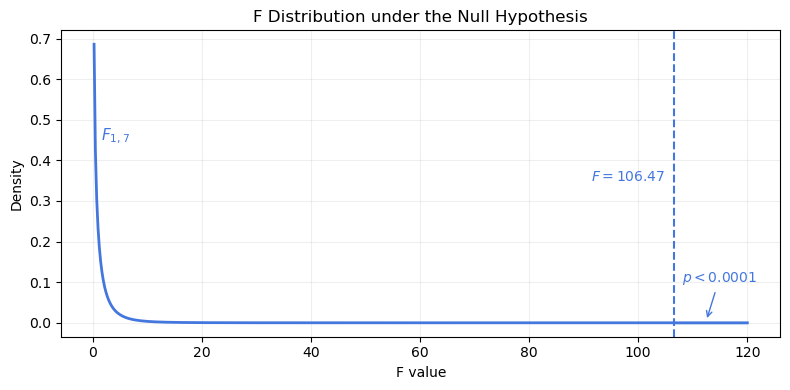

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f

# Parameters for the F-distribution
df_model = 1   # numerator df
df_error = 7   # denominator df
F_stat = 106.47

# Generate F-distribution values
x = np.linspace(0, 120, 500)
y = f.pdf(x, df_model, df_error)

# Create the figure and axis object
fig, ax = plt.subplots(figsize=(8, 4))

# Plot the F-distribution
ax.plot(x, y, color='#4477DD', lw=2)

# Shade rejection region
x_shade = np.linspace(F_stat, 120, 200)
y_shade = f.pdf(x_shade, df_model, df_error)
ax.fill_between(x_shade, y_shade, color='#4477DD', alpha=0.4, label='p < 0.0001')

# Vertical line for F-stat
ax.axvline(F_stat, color='#4477DD', linestyle='--', lw=1.5)
ax.text(F_stat - 1.5, 0.35, r'$F = 106.47$', color='#4477DD', fontsize=10, fontweight='bold', ha='right')

# Add curve label
ax.text(1.5, 0.45, '$F_{1,7}$', color='#4477DD', fontsize=11, fontweight='bold')

# Annotate p-value with arrow
ax.annotate(r'$p < 0.0001$', 
            xy=(F_stat + 6, 0.005), 
            xytext=(F_stat + 1.5, 0.1), 
            arrowprops=dict(arrowstyle='->', color='#4477DD'),
            fontsize=10, color='#4477DD')

# Labels and title
ax.set_xlabel('F value')
ax.set_ylabel('Density')
ax.set_title('F Distribution under the Null Hypothesis')
ax.grid(alpha=0.2)
plt.tight_layout()
plt.show()
